In [11]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

# Carrega o dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [14]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [16]:
# Determina a melhor quantidade de clusters (K) usando o método do cotovelo
def find_best_k(data):
    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Encontrar o Melhor K')
    plt.show()

    # Melhor K é onde a curva começa a se estabilizar (cotovelo)
    best_k = np.argmin(np.diff(inertia)) + 2
    return best_k

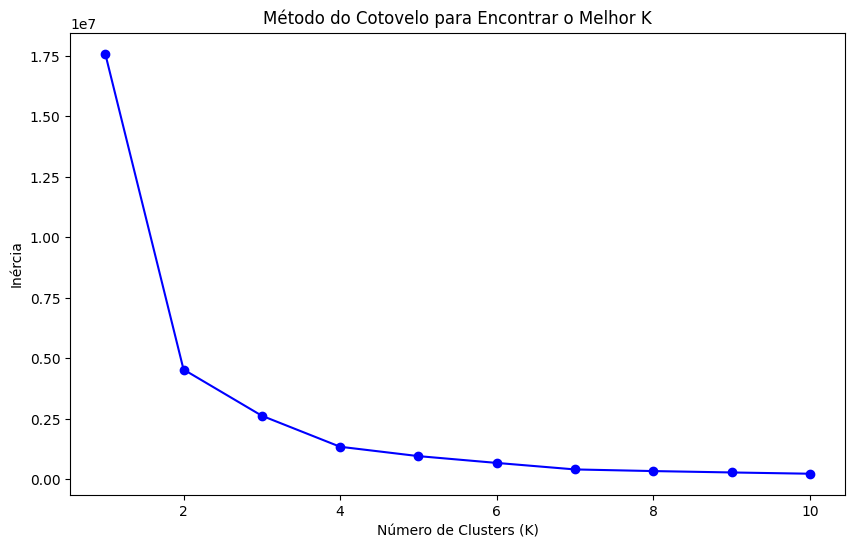

In [17]:
# Encontra o melhor K
best_k = find_best_k(df)

In [18]:
# Cria o modelo de KMeans com o melhor K
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [19]:
# Descreve os resultados apresentados pelo modelo
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=wine.feature_names)
print("Centros dos Clusters:\n", cluster_centers)

Centros dos Clusters:
      alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
0  12.702846    2.544553  2.339106          20.408130   96.813008   
1  13.666545    1.870727  2.427818          17.452727  106.290909   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       2.062114    1.641463              0.392683         1.454065   
1       2.816182    2.896545              0.292909         1.896909   

   color_intensity       hue  od280/od315_of_diluted_wines      proline  
0         4.851382  0.908618                      2.408211   565.869919  
1         5.520364  1.066655                      3.066727  1151.727273  


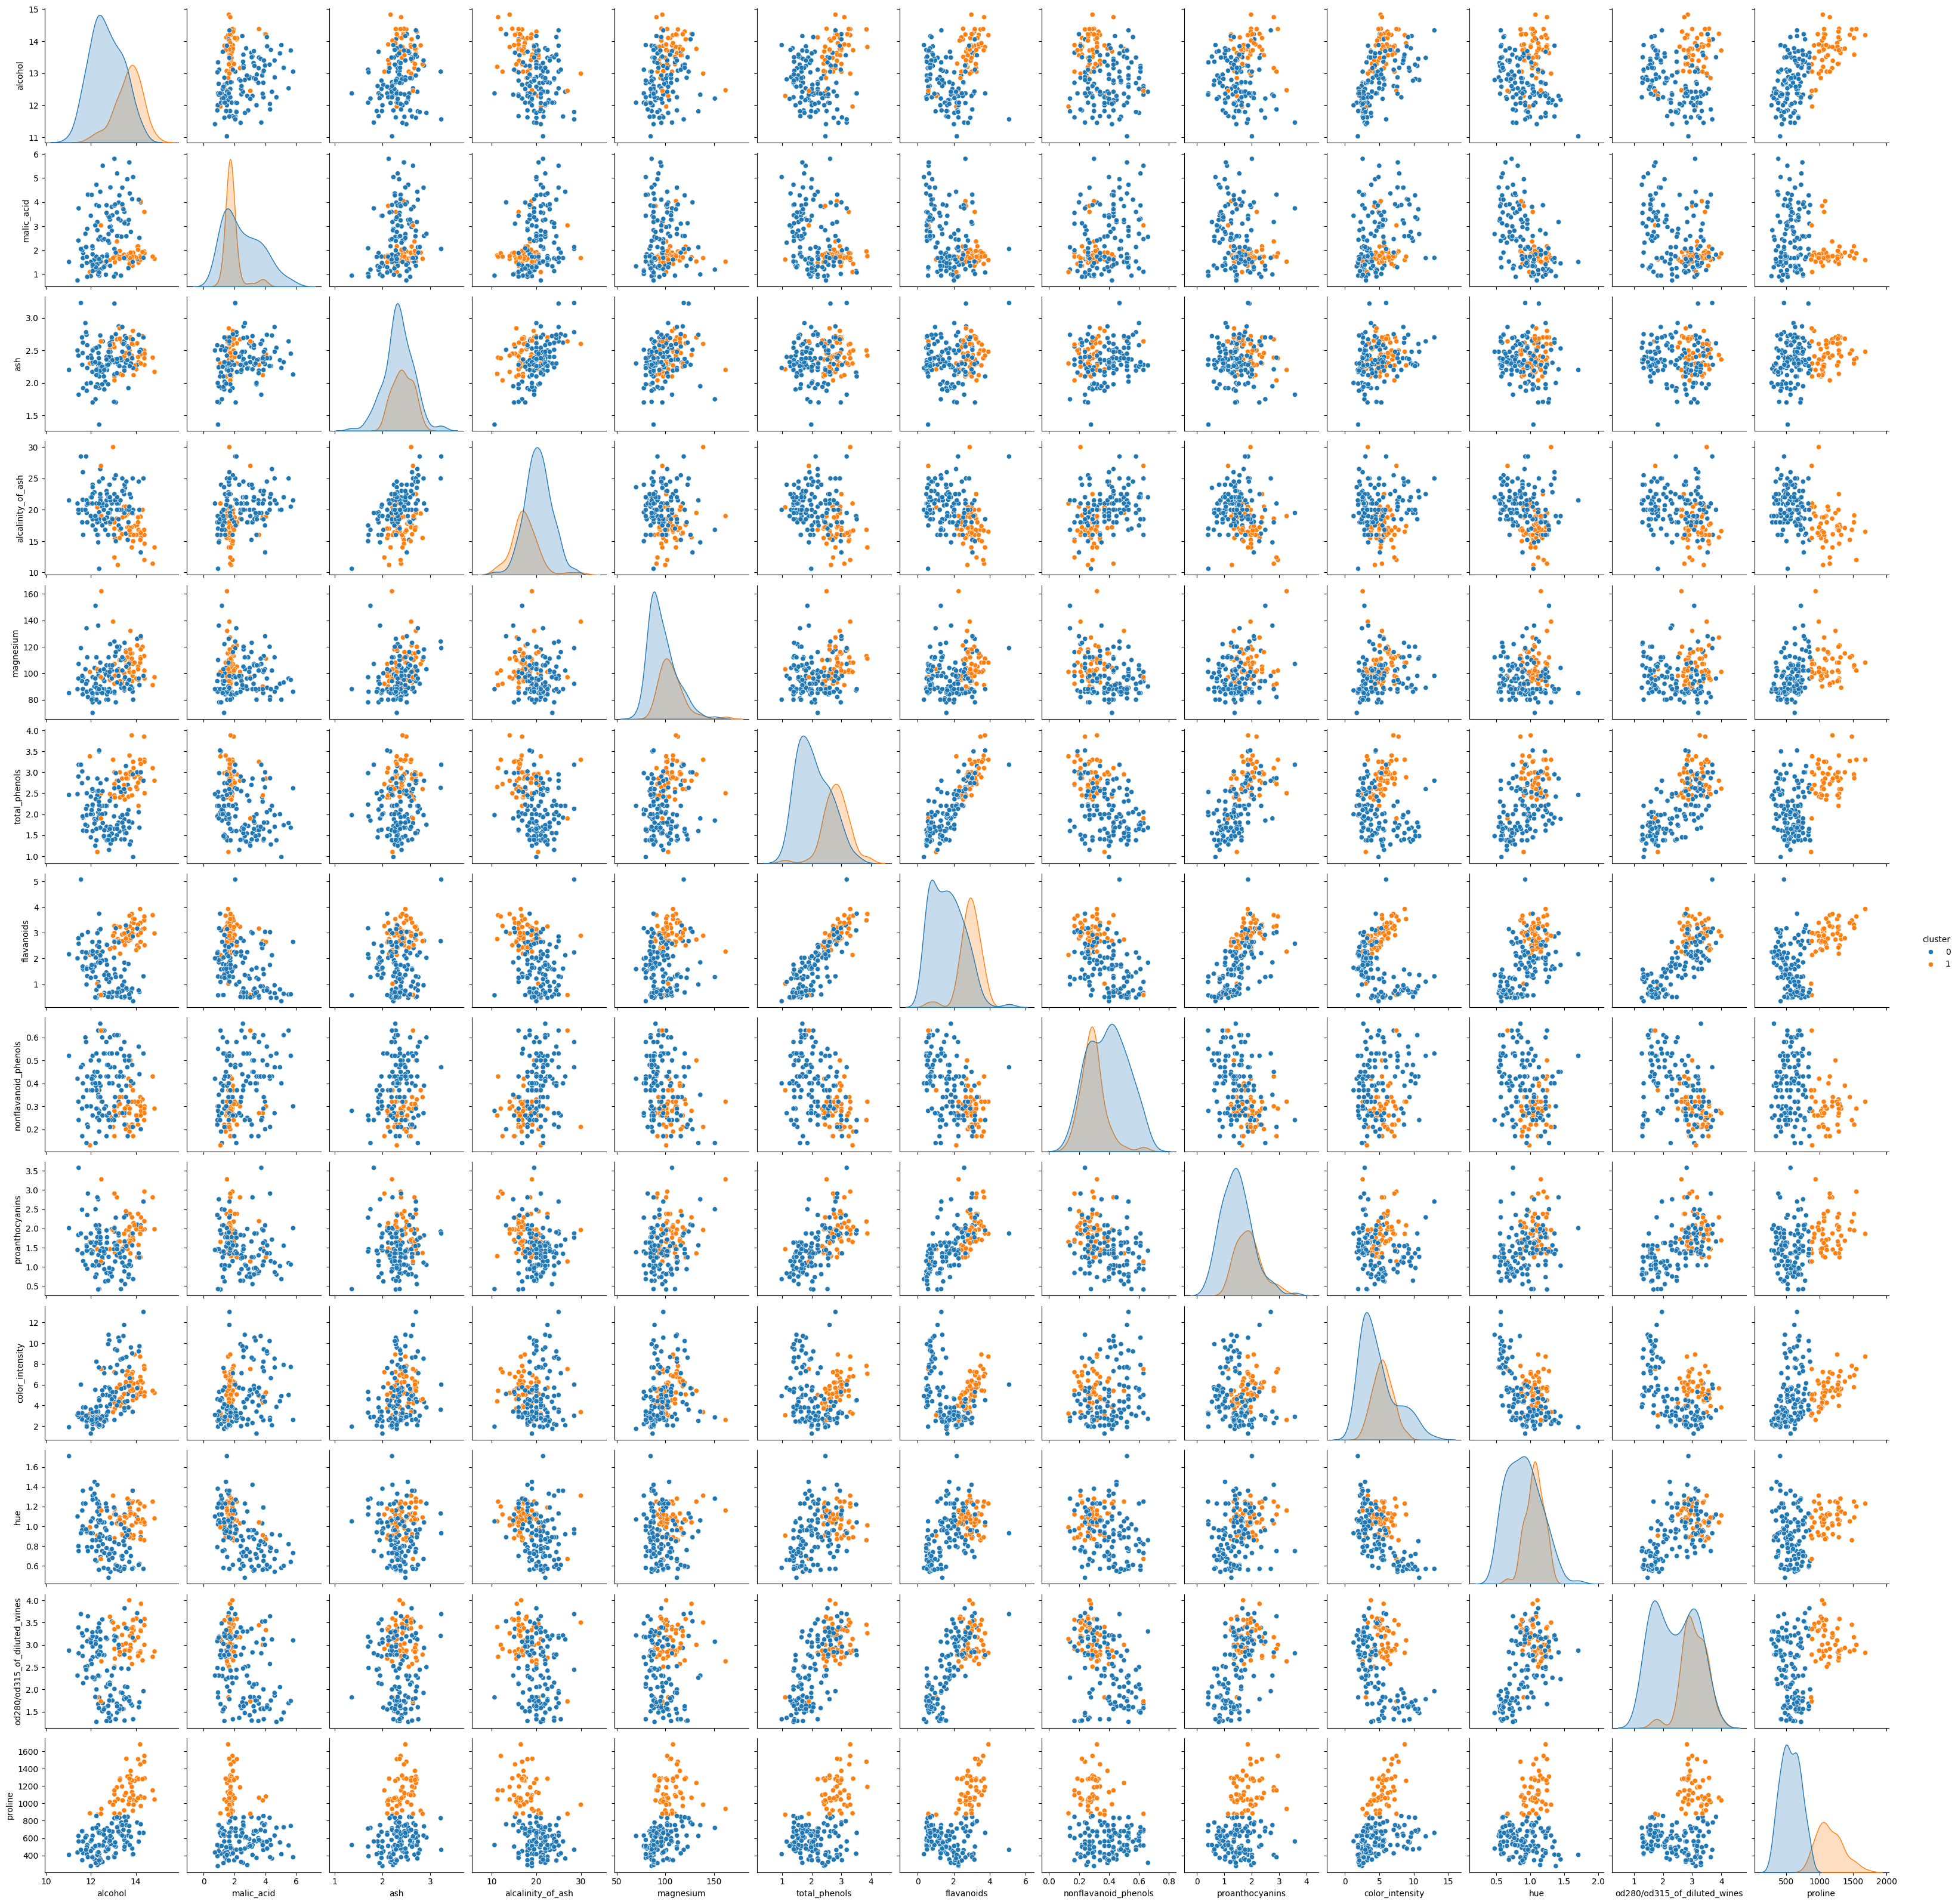

In [20]:
# Visualiza os clusters
sns.pairplot(df, hue='cluster', palette='tab10')
plt.show()